<a href="https://colab.research.google.com/github/Keerthana123-coder/SALES-TRANSACTION/blob/main/SalesTransactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing package

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv(r'/content/Sales Transaction v.4a.csv')

In [ ]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [ ]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


In [ ]:
df.value_counts()

TransactionNo  Date        ProductNo  ProductName                          Price  Quantity  CustomerNo  Country       
555524         6/5/2019    22698      Pink Regency Teacup And Saucer       13.27   1        16923.0     United Kingdom    20
                           22697      Green Regency Teacup And Saucer      13.27   1        16923.0     United Kingdom    12
572861         10/26/2019  22775      Purple Drawerknob Acrylic Edwardian  11.53   12       14102.0     United Kingdom     8
547651         3/24/2019   82613A     Metal Sign Cupcake Single Hook       11.53   1        16904.0     United Kingdom     8
540524         1/9/2019    21756      Bath Building Block Word             16.35   1        16735.0     United Kingdom     6
                                                                                                                          ..
552702         5/10/2019   84912B     Green Rose Washbag                   13.62   1        12702.0     Germany            1
                           84849D     Hot Baths Soap Holder                13.62   1        12702.0     Germany            1
                           84796B     Blue Savannah Picnic Hamper For 2    18.75   3        12702.0     Germany            1
                           84596B     Small Dolly Mix Design Orange Bowl   11.10   4        12702.0     Germany            1
C581569        12/9/2019   84978      Hanging Heart Jar T-Light Holder     6.19   -1        17315.0     United Kingdom     1
Name: count, Length: 531095, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


# checking null values

In [ ]:
df.isnull().sum()

,0
TransactionNo,0
Date,0
ProductNo,0
ProductName,0
Price,0
Quantity,0
CustomerNo,55
Country,0


# filling null values

In [ ]:

df['CustomerNo']=df['CustomerNo'].fillna(df['CustomerNo'].median())
#df['Country']=df['Country'].fillna(df['Country'].mode())



In [ ]:
df.isnull().sum()

,0
TransactionNo,0
Date,0
ProductNo,0
ProductName,0
Price,0
Quantity,0
CustomerNo,0
Country,0


# for noisy data  outliers


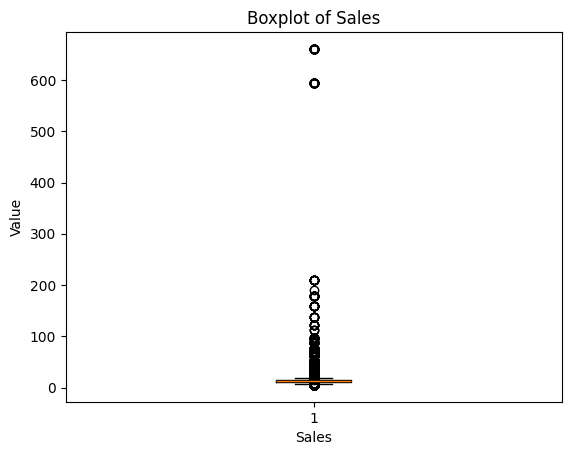

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Sales' is the column you want to plot
plt.boxplot(df['Price'])
plt.xlabel('Sales')
plt.ylabel('Value')
plt.title('Boxplot of Sales')
plt.show()


In [ ]:
from scipy import stats
import numpy as np
z_score = stats.zscore(df['Price'])
abs_z_score = np.abs(z_score)
filtered_entries = (abs_z_score < 3)
df = df[filtered_entries]
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


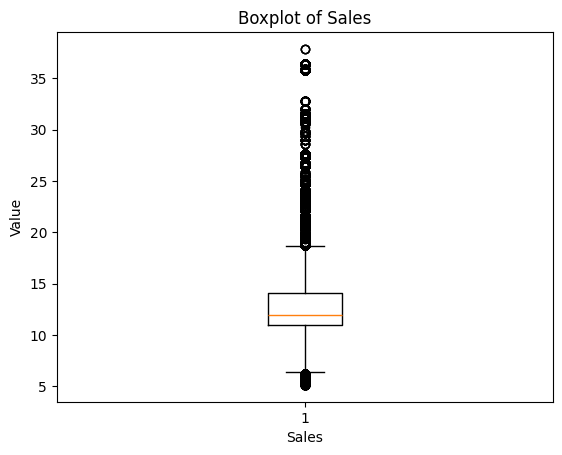

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Sales' is the column you want to plot
plt.boxplot(df['Price'])
plt.xlabel('Sales')
plt.ylabel('Value')
plt.title('Boxplot of Sales')
plt.show()


# LabelEncoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as count
le= LabelEncoder()
print("before LabelEncoding:",count(df['ProductName']))
df['ProductName']=le.fit_transform(df['ProductName'])
print("after LabelEncoding ",count(df['ProductName']))

before LabelEncoding: Counter({'Cream Hanging Heart T-Light Holder': 2378, 'Regency Cakestand 3 Tier': 2200, 'Jumbo Bag Red Retrospot': 2159, 'Party Bunting': 1727, 'Lunch Bag Red Retrospot': 1639, 'Assorted Colour Bird Ornament': 1501, 'Popcorn Holder': 1476, 'Set Of 3 Cake Tins Pantry Design': 1473, 'Pack Of 72 Retrospot Cake Cases': 1385, 'Lunch Bag Black Skull': 1350, 'Lunch Bag Suki Design': 1348, 'Natural Slate Heart Chalkboard': 1280, 'Jumbo Bag Vintage Doily': 1266, 'Jumbo Bag Pink Polkadot': 1251, 'Heart Of Wicker Small': 1237, 'Jam Making Set With Jars': 1229, 'Jumbo Storage Bag Suki': 1214, "Paper Chain Kit 50'S Christmas": 1210, 'Jumbo Shopper Vintage Red Paisley': 1202, 'Lunch Bag Cars Blue': 1197, 'Lunch Bag Spaceboy Design': 1192, 'Jam Making Set Printed': 1182, 'Recipe Box Pantry Yellow Design': 1180, 'Spotty Bunting': 1179, 'Roses Regency Teacup And Saucer': 1138, 'Lunch Bag Pink Polkadot': 1137, 'Lunch Bag Vintage Doily': 1134, 'Wooden Picture Frame White Finish': 112

In [ ]:
print("before LabelEncoding:",count(df['Country']))
df['Country']=le.fit_transform(df['Country'])
print("after LabelEncoding ",count(df['Country']))

before LabelEncoding: Counter({'United Kingdom': 484324, 'Germany': 10660, 'France': 10517, 'EIRE': 8032, 'Belgium': 2534, 'Spain': 2424, 'Switzerland': 2334, 'Netherlands': 2324, 'Portugal': 1845, 'Australia': 1702, 'Norway': 938, 'Austria': 885, 'Iceland': 787, 'Finland': 692, 'Italy': 660, 'Channel Islands': 629, 'Cyprus': 574, 'Unspecified': 447, 'Sweden': 417, 'Denmark': 416, 'USA': 379, 'Japan': 371, 'Israel': 355, 'Singapore': 213, 'Poland': 173, 'Hong Kong': 153, 'Canada': 150, 'Malta': 149, 'Greece': 67, 'United Arab Emirates': 67, 'European Community': 58, 'RSA': 57, 'Lebanon': 45, 'Lithuania': 34, 'Brazil': 31, 'Czech Republic': 28, 'Bahrain': 17, 'Saudi Arabia': 10})
after LabelEncoding  Counter({36: 484324, 14: 10660, 13: 10517, 10: 8032, 3: 2534, 31: 2424, 33: 2334, 24: 2324, 27: 1845, 0: 1702, 25: 938, 1: 885, 17: 787, 12: 692, 19: 660, 6: 629, 7: 574, 37: 447, 32: 417, 9: 416, 34: 379, 20: 371, 18: 355, 30: 213, 26: 173, 16: 153, 5: 150, 23: 149, 15: 67, 35: 67, 11: 58,

In [ ]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,2907,21.47,12,17490.0,36
1,581475,12/9/2019,22596,728,10.65,36,13069.0,36
2,581475,12/9/2019,23235,3248,11.53,12,13069.0,36
3,581475,12/9/2019,23272,3383,10.65,12,13069.0,36
4,581475,12/9/2019,23239,2947,11.94,6,13069.0,36


# implement an imputation

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# Select only numerical features for imputation
numerical_features = df.select_dtypes(include=['number']).columns
df_numerical = df[numerical_features]

# Apply IterativeImputer to numerical features
imputer = IterativeImputer()
df_imputed = imputer.fit_transform(df_numerical)

# Create a new DataFrame with imputed numerical features
df_imputed = pd.DataFrame(df_imputed, columns=numerical_features, index=df.index)

# Concatenate imputed numerical features with original non-numerical features
df = pd.concat([df.drop(columns=numerical_features), df_imputed], axis=1)

print(df)

       TransactionNo       Date ProductNo  ProductName  Price  Quantity  \
0             581482  12/9/2019     22485       2907.0  21.47      12.0   
1             581475  12/9/2019     22596        728.0  10.65      36.0   
2             581475  12/9/2019     23235       3248.0  11.53      12.0   
3             581475  12/9/2019     23272       3383.0  10.65      12.0   
4             581475  12/9/2019     23239       2947.0  11.94       6.0   
...              ...        ...       ...          ...    ...       ...   
536345       C536548  12/1/2018     22168       2091.0  18.96      -2.0   
536346       C536548  12/1/2018     21218       2639.0  14.09      -3.0   
536347       C536548  12/1/2018     20957       2488.0  11.74      -1.0   
536348       C536548  12/1/2018     22580        118.0  16.35      -4.0   
536349       C536548  12/1/2018     22767       3387.0  20.45      -2.0   

        CustomerNo  Country  
0          17490.0     36.0  
1          13069.0     36.0  
2        

# Dropping columns

In [ ]:
columns = input("enter columns names to drop").split(",")
print("before dropping columns",df.columns)
drop_columns = df.drop(df.columns['CustomerNo	'],axis=1,inplace=True)
print("after dropping columns",drop_columns)

KeyboardInterrupt: Interrupted by user

In [ ]:
df


In [ ]:
#identifying duplicates in dataset
duplicate_mask = df.duplicated()
duplicates = df[duplicate_mask]
print(duplicates)

       TransactionNo       Date ProductNo  ProductName  Price  Quantity  \
985           581497  12/9/2019     21481       1113.0   7.24       1.0   
1365          581538  12/9/2019     23275       2919.0   6.19       1.0   
1401          581538  12/9/2019     22992       2696.0   6.19       1.0   
1406          581538  12/9/2019     22694       3621.0   6.19       1.0   
1409          581538  12/9/2019     23343       1676.0   6.19       1.0   
...              ...        ...       ...          ...    ...       ...   
535227        536559  12/1/2018    51014L       1116.0  11.12      12.0   
535310        536569  12/1/2018     22111       2798.0  15.32       1.0   
535327        536569  12/1/2018     21809        716.0  11.53       1.0   
535960        536592  12/1/2018    82613A       1899.0  12.82       1.0   
536190        536528  12/1/2018     22839         41.0  25.57       1.0   

        CustomerNo  Country  
985        17497.0     36.0  
1365       14446.0     36.0  
1401     

In [ ]:
# Remove duplicates
data = df.drop_duplicates()


In [ ]:
data

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,2907.0,21.47,12.0,17490.0,36.0
1,581475,12/9/2019,22596,728.0,10.65,36.0,13069.0,36.0
2,581475,12/9/2019,23235,3248.0,11.53,12.0,13069.0,36.0
3,581475,12/9/2019,23272,3383.0,10.65,12.0,13069.0,36.0
4,581475,12/9/2019,23239,2947.0,11.94,6.0,13069.0,36.0
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,2091.0,18.96,-2.0,12472.0,14.0
536346,C536548,12/1/2018,21218,2639.0,14.09,-3.0,12472.0,14.0
536347,C536548,12/1/2018,20957,2488.0,11.74,-1.0,12472.0,14.0
536348,C536548,12/1/2018,22580,118.0,16.35,-4.0,12472.0,14.0


In [ ]:
data.to_csv('cleaned_dataset sales transactions.csv', index=False)

In [ ]:
data

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,2907.0,21.47,12.0,17490.0,36.0
1,581475,12/9/2019,22596,728.0,10.65,36.0,13069.0,36.0
2,581475,12/9/2019,23235,3248.0,11.53,12.0,13069.0,36.0
3,581475,12/9/2019,23272,3383.0,10.65,12.0,13069.0,36.0
4,581475,12/9/2019,23239,2947.0,11.94,6.0,13069.0,36.0
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,2091.0,18.96,-2.0,12472.0,14.0
536346,C536548,12/1/2018,21218,2639.0,14.09,-3.0,12472.0,14.0
536347,C536548,12/1/2018,20957,2488.0,11.74,-1.0,12472.0,14.0
536348,C536548,12/1/2018,22580,118.0,16.35,-4.0,12472.0,14.0


# implement Linear Regression


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the cleaned dataset
data = pd.read_csv('cleaned_dataset sales transactions.csv')

# Define features (X) and target variable (y)
X = data[['ProductName', 'Country', 'Price']]  # Example features, adjust as needed
y = data['Quantity']  # Example target, adjust as needed

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2249.9246966048986
R-squared: 0.006580336083010341


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#Assuming 'target' is the binary column to predict

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)
accuracy=accuracy_score(y_test,predictions)
print(f'accuracy:{accuracy}')